# **Cat Vs Dog Prediction**

**TensorFlow import**

In [ ]:
import tensorflow as tf

**TensorFlow version check**

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-08-17 15:12:39--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-08-17 15:12:40--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c165d6fbd1428d620883a76b2.dl.dropboxusercontent.com/cd/0/inline/CB_mcEjt1FTkpXADEjxeWeTtyhNYpukcLSGHCbddIFqvCJP7jhKu5Dv_A1uNq1WOCV74gb5KXneTZW8UVqPRxnJiDqCoVv6MjUpxxGR2HKSWylSHmURoaY5wLPiHUfQc6mQa3Z8HZA4c7SyAP98LAC7S/file# [following]
--2023-08-17 15:12:40--  https://uc0c165d6fbd1428d620883a76b2.dl.dropboxusercontent.com/cd/0/inline/CB_mcEjt1FTkpXADEjxeWeTtyhNYpukcLSGHCbddIFqvCJP7jhKu5Dv_A1uNq1WOCV74gb5KXneTZW8UVqPRxnJiDq

In [ ]:
!unzip /content/training_set.zip
!unzip /content/test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

**Printing a sample image**

Populating the interactive namespace from numpy and matplotlib


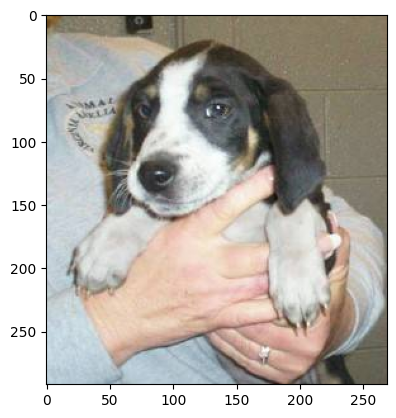

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/training_set/training_set/dogs/dog.10.jpg')#path of image
imgplot=plt.imshow(img)
plt.show()

**Libraries required**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


**Initialization of parameter**

In [ ]:
img_width,img_height=(150,150)
train_data_dir='/content/test_set/test_set' #path of trainiing data set
validation_data_dir='/content/training_set/training_set'#path of validation dataset or testing dataset
nb_train_sample=100
nb_validation_samples=10
epochs=10
batch=16

**Changing Shape of the images**

Data is in form od 3D array as rows*cols*channels in the channel
Channels are first dimension in channel first representation.
150x150X3

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_chape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

**Image generation to train the model**

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator (rescale=1./255)# bringing rgb value from0-255 to range of 0-1
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height), batch_size=batch , class_mode='binary')#,classes=['cats','dogs'])
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch,class_mode='binary')

Found 2023 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


Representing the image data generator

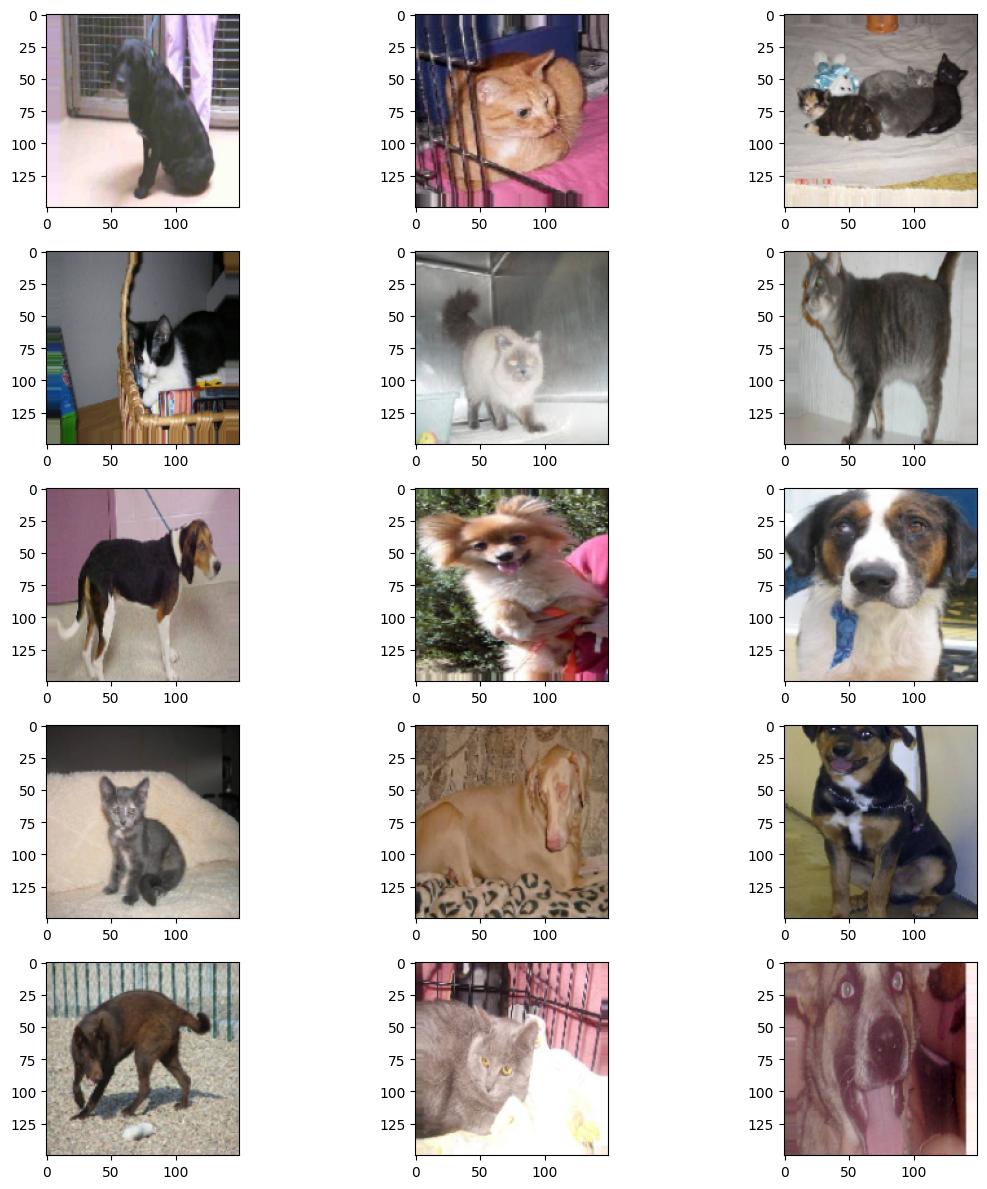

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch,Y_batch in train_generator:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

building the cnn model
layers in cnn:
1.convoution layer
2. relu layer
3.pooling layer
4. fully connected layer(dense)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))   #64 neurons using 3X3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#pooling reduce the size of data

model.add(Flatten())#conversion of multidimensional arrar to 1D array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))#output layer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_18 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 350464)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                22429760  
                                                                 
 activation_19 (Activation)  (None, 64)                0         
                                                      

Model compiling

In [ ]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_18 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 350464)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                22429760  
                                                                 
 activation_19 (Activation)  (None, 64)                0         
                                                      

model fitting

In [ ]:
training = model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples,)

Epoch 1/10
100/100 [==============================] - 51s 500ms/step - loss: 1.1339 - accuracy: 0.5556 - val_loss: 0.6657 - val_accuracy: 0.6062
Epoch 2/10
100/100 [==============================] - 50s 496ms/step - loss: 0.6661 - accuracy: 0.6062 - val_loss: 0.6619 - val_accuracy: 0.6375
Epoch 3/10
100/100 [==============================] - 50s 495ms/step - loss: 0.6367 - accuracy: 0.6304 - val_loss: 0.6290 - val_accuracy: 0.6625
Epoch 4/10
100/100 [==============================] - 50s 503ms/step - loss: 0.6034 - accuracy: 0.6750 - val_loss: 0.7287 - val_accuracy: 0.6375
Epoch 5/10
100/100 [==============================] - 50s 497ms/step - loss: 0.5969 - accuracy: 0.6963 - val_loss: 0.5803 - val_accuracy: 0.7125
Epoch 6/10
100/100 [==============================] - 50s 504ms/step - loss: 0.6043 - accuracy: 0.6732 - val_loss: 0.6531 - val_accuracy: 0.6125
Epoch 7/10
100/100 [==============================] - 50s 497ms/step - loss: 0.5822 - accuracy: 0.7058 - val_loss: 0.7335 - val_ac

finding accuracy of the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

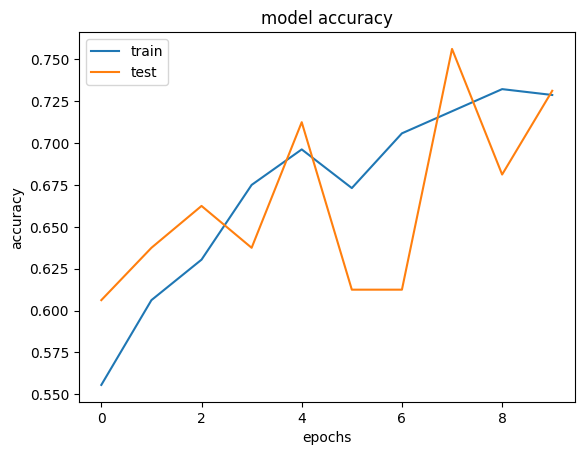

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
print(training.history.keys())#listening all training data)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show

image prediction

1/1 [==============================] - 0s 70ms/step
[[1.]]
Prediction =  dog


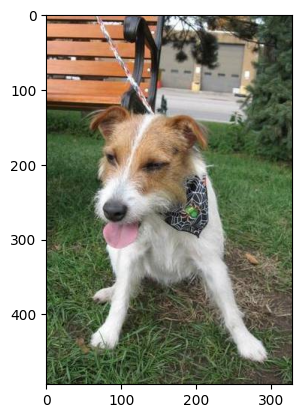

In [ ]:
import numpy as np
image=tf.keras.utils
test_path="/content/test_set/test_set/dogs/dog.4059.jpg"

img_pred=image.load_img(test_path,target_size=(150,150))#add path of the image
#img_pred=image.load_img("/content/test_set/test_set/cats/cat.4001.jpg",target_size=(150,150))#add path of the image

img_pred=tf.keras.utils.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction="dog"
else:
  prediction="cat"
print("Prediction = ",prediction)


#img=mpimg.imread("/content/test_set/test_set/cats/cat.4001.jpg")
img=mpimg.imread(test_path)
ingplot=plt.imshow(img)
plt.show()